Let us explore the impact of pre-pruning in more detail using the Breast Cancer dataset.

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz

In [ ]:
cancer = load_breast_cancer()

# Split train and test cases
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

# Train model
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print(f"Accuracy on training set: {tree.score(X_train, y_train):.3f}")
print(f"Accuracy on testing set: {tree.score(X_test, y_test):.3f}")


Accuracy on training set: 1.000
Accuracy on testing set: 0.937


If the depth of a decision tree is not restricted, it can become excessively deep and complex. As a result, unpruned trees are more prone to overfitting and may struggle to generalize effectively to new data. To mitigate this, we can apply pre-pruning to prevent the tree from perfectly fitting the training data. One method is to halt the tree's growth once it reaches a certain depth. For example, by setting max_depth=4, the tree can only ask up to four questions. Limiting the tree’s depth helps reduce overfitting, which results in a decrease in training set accuracy but an improvement in accuracy on the test set.

In [3]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print(f"Accuracy on training set: {tree.score(X_train, y_train):.3f}")
print(f"Accuracy on testing set: {tree.score(X_test, y_test):.3f}")

Accuracy on training set: 0.988
Accuracy on testing set: 0.951


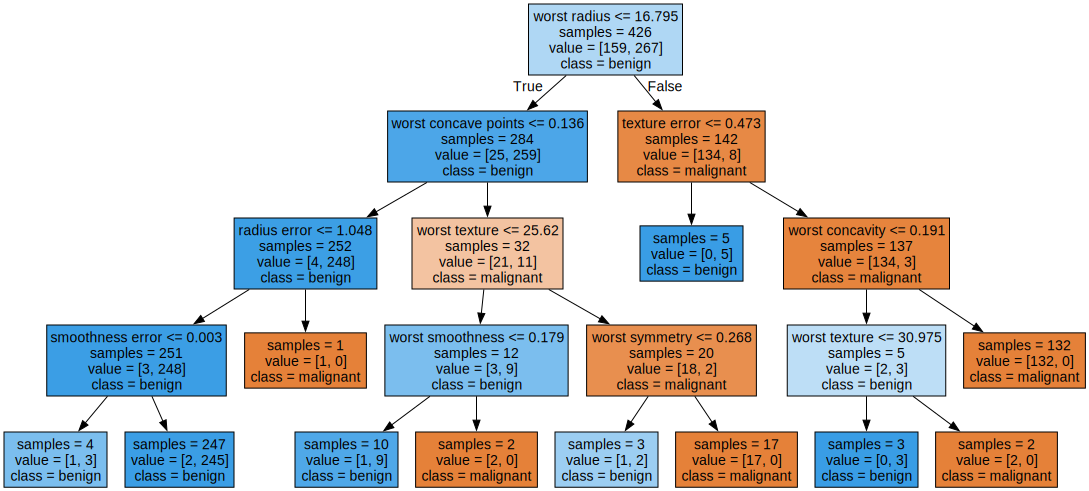

In [4]:
export_graphviz(tree, out_file='tree.dot', class_names=['malignant', 'benign'],
                feature_names=cancer.feature_names, impurity=False, filled=True                
)

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)